In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
df = pd.read_csv('./data/공공자전거 대여이력 정보_2020.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.00
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.00
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.00
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.00
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2725232,SPB-12680,2020-06-30 13:01:33,1346,길음8골어린이공원 옆,1,2020-07-01 02:50:27,1347,길음래미안아파트817동 상가 앞,1,15,7230.00
2725233,SPB-40800,2020-06-30 23:56:30,107,신한은행 서교동금융센터점 앞,0,2020-07-01 07:41:32,438,성산2-1 공영주차장,0,465,0.00
2725234,SPB-32402,2020-06-30 16:45:32,1956,도야미리숯불갈비 앞,0,2020-07-01 08:04:52,1956,도야미리숯불갈비 앞,0,919,39786.76
2725235,SPB-38526,2020-06-30 23:23:38,703,오목교역 7번출구 앞,0,2020-07-01 08:37:15,734,신트리공원 입구,0,554,0.00


In [3]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df

,대여일시,대여대여소명,반납일시,반납대여소명
0,2020-06-01 00:00:35,현대6차 아파트,2020-06-01 00:05:24,양지근린공원앞
1,2020-06-01 00:01:47,신용산역 6번출구 앞,2020-06-01 00:05:54,베르가모앞
2,2020-06-01 00:03:05,둔촌역 3번 출입구,2020-06-01 00:05:59,둔촌사거리
3,2020-06-01 00:04:31,잠실나루역 (2번 출구 쪽),2020-06-01 00:06:10,잠실나루역 (2번 출구 쪽)
4,2020-06-01 00:00:46,등촌역 7번출구,2020-06-01 00:06:53,염창역 1번 출구
...,...,...,...,...
2725232,2020-06-30 13:01:33,길음8골어린이공원 옆,2020-07-01 02:50:27,길음래미안아파트817동 상가 앞
2725233,2020-06-30 23:56:30,신한은행 서교동금융센터점 앞,2020-07-01 07:41:32,성산2-1 공영주차장
2725234,2020-06-30 16:45:32,도야미리숯불갈비 앞,2020-07-01 08:04:52,도야미리숯불갈비 앞
2725235,2020-06-30 23:23:38,오목교역 7번출구 앞,2020-07-01 08:37:15,신트리공원 입구


In [4]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [5]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [6]:
df = df.sort_values('대여일시', ignore_index = True)

In [7]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]

In [8]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

### 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [9]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,6,1,0,0,0
1,2020-06-01 00:00:16,응암시장교차로,6,1,0,0,0
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,6,1,0,0,0
3,2020-06-01 00:00:26,능골근린공원,6,1,0,0,0
4,2020-06-01 00:00:32,응봉역 1번출구,6,1,0,0,0
...,...,...,...,...,...,...,...
2724714,2020-06-30 23:55:01,천호초교 입구 사거리(일주빌딩),6,30,1,23,55
2724715,2020-06-30 23:55:17,가좌삼거리,6,30,1,23,55
2724716,2020-06-30 23:56:01,신사역 4번출구 뒤,6,30,1,23,56
2724717,2020-06-30 23:56:41,쌍문현대1차아파트 108동 앞,6,30,1,23,56


In [10]:
df_rental = df_rental[df_rental['대여대여소명'] == '뚝섬유원지역 1번출구 앞']
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:04:32,뚝섬유원지역 1번출구 앞,6,1,0,0,4
1,2020-06-01 01:39:21,뚝섬유원지역 1번출구 앞,6,1,0,1,39
2,2020-06-01 01:41:13,뚝섬유원지역 1번출구 앞,6,1,0,1,41
3,2020-06-01 02:15:11,뚝섬유원지역 1번출구 앞,6,1,0,2,15
4,2020-06-01 03:21:34,뚝섬유원지역 1번출구 앞,6,1,0,3,21
...,...,...,...,...,...,...,...
16350,2020-06-30 22:13:24,뚝섬유원지역 1번출구 앞,6,30,1,22,13
16351,2020-06-30 22:16:27,뚝섬유원지역 1번출구 앞,6,30,1,22,16
16352,2020-06-30 22:33:16,뚝섬유원지역 1번출구 앞,6,30,1,22,33
16353,2020-06-30 23:03:20,뚝섬유원지역 1번출구 앞,6,30,1,23,3


#### 0시

In [11]:
df_rental_hour = df_rental[df_rental['대여시간'] == 0]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,154
1,10,108
2,20,88
3,30,112
4,40,94
5,50,88


In [12]:
# 10분당 평균 대여율 = 평균서비스율

mu0 = df_rental_hour_group['count'].sum() / 6
mu0

107.33333333333333

#### 1시

In [13]:
df_rental_hour = df_rental[df_rental['대여시간'] == 1]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,62
1,10,75
2,20,60
3,30,64
4,40,44
5,50,54


In [14]:
# 1시 10분당 평균 대여율 = 평균서비스율

mu1 = df_rental_hour_group['count'].sum() / 6
mu1

59.833333333333336

#### 2시

In [15]:
df_rental_hour = df_rental[df_rental['대여시간'] == 2]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,37
1,10,53
2,20,41
3,30,34
4,40,24
5,50,43


In [16]:
# 2시 10분당 평균 대여율 = 평균서비스율

mu2 = df_rental_hour_group['count'].sum() / 6
mu2

38.666666666666664

#### 3시

In [17]:
df_rental_hour = df_rental[df_rental['대여시간'] == 3]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,14
1,10,31
2,20,24
3,30,20
4,40,15
5,50,13


In [18]:
# 10분당 평균 대여율 = 평균서비스율

mu3 = df_rental_hour_group['count'].sum() / 6
mu3

19.5

#### 4시

In [19]:
df_rental_hour = df_rental[df_rental['대여시간'] == 4]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,6
1,10,21
2,20,30
3,30,15
4,40,26
5,50,20


In [20]:
# 10분당 평균 대여율 = 평균서비스율

mu4 = df_rental_hour_group['count'].sum() / 6
mu4

19.666666666666668

#### 5시

In [21]:
df_rental_hour = df_rental[df_rental['대여시간'] == 5]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,18
1,10,10
2,20,8
3,30,5
4,40,10
5,50,10


In [22]:
# 10분당 평균 대여율 = 평균서비스율

mu5 = df_rental_hour_group['count'].sum() / 6
mu5

10.166666666666666

#### 6시

In [23]:
df_rental_hour = df_rental[df_rental['대여시간'] == 6]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,8
1,10,13
2,20,9
3,30,22
4,40,26
5,50,32


In [24]:
# 10분당 평균 대여율 = 평균서비스율

mu6 = df_rental_hour_group['count'].sum() / 6
mu6

18.333333333333332

#### 7시

In [25]:
df_rental_hour = df_rental[df_rental['대여시간'] == 7]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,26
1,10,19
2,20,22
3,30,28
4,40,30
5,50,52


In [26]:
# 10분당 평균 대여율 = 평균서비스율

mu7 = df_rental_hour_group['count'].sum() / 6
mu7

29.5

#### 8시

In [27]:
df_rental_hour = df_rental[df_rental['대여시간'] == 8]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,48
1,10,83
2,20,98
3,30,126
4,40,69
5,50,35


In [28]:
# 10분당 평균 대여율 = 평균서비스율

mu8 = df_rental_hour_group['count'].sum() / 6
mu8

76.5

#### 9시

In [29]:
df_rental_hour = df_rental[df_rental['대여시간'] == 9]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,42
1,10,18
2,20,36
3,30,24
4,40,31
5,50,30


In [30]:
# 10분당 평균 대여율 = 평균서비스율

mu9 = df_rental_hour_group['count'].sum() / 6
mu9

30.166666666666668

#### 10시

In [31]:
df_rental_hour = df_rental[df_rental['대여시간'] == 10]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,42
1,10,39
2,20,42
3,30,27
4,40,45
5,50,46


In [32]:
# 10분당 평균 대여율 = 평균서비스율

mu10 = df_rental_hour_group['count'].sum() / 6
mu10

40.166666666666664

#### 11시

In [33]:
df_rental_hour = df_rental[df_rental['대여시간'] == 11]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,38
1,10,38
2,20,38
3,30,34
4,40,50
5,50,46


In [34]:
# 10분당 평균 대여율 = 평균서비스율

mu11 = df_rental_hour_group['count'].sum() / 6
mu11

40.666666666666664

#### 12시

In [35]:
df_rental_hour = df_rental[df_rental['대여시간'] == 12]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,42
1,10,48
2,20,47
3,30,44
4,40,32
5,50,37


In [36]:
# 10분당 평균 대여율 = 평균서비스율

mu12 = df_rental_hour_group['count'].sum() / 6
mu12

41.666666666666664

#### 13시

In [37]:
df_rental_hour = df_rental[df_rental['대여시간'] == 13]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,38
1,10,46
2,20,45
3,30,46
4,40,51
5,50,48


In [38]:
# 10분당 평균 대여율 = 평균서비스율

mu13 = df_rental_hour_group['count'].sum() / 6
mu13

45.666666666666664

#### 14시

In [39]:
df_rental_hour = df_rental[df_rental['대여시간'] == 14]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,67
1,10,50
2,20,57
3,30,43
4,40,53
5,50,67


In [40]:
# 10분당 평균 대여율 = 평균서비스율

mu14 = df_rental_hour_group['count'].sum() / 6
mu14

56.166666666666664

#### 15시

In [41]:
df_rental_hour = df_rental[df_rental['대여시간'] == 15]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,86
1,10,101
2,20,91
3,30,77
4,40,79
5,50,88


In [42]:
# 10분당 평균 대여율 = 평균서비스율

mu15 = df_rental_hour_group['count'].sum() / 6
mu15

87.0

#### 16시

In [43]:
df_rental_hour = df_rental[df_rental['대여시간'] == 16]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,114
1,10,102
2,20,104
3,30,99
4,40,135
5,50,121


In [44]:
# 10분당 평균 대여율 = 평균서비스율

mu16 = df_rental_hour_group['count'].sum() / 6
mu16

112.5

#### 17시

In [45]:
df_rental_hour = df_rental[df_rental['대여시간'] == 17]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,138
1,10,137
2,20,156
3,30,174
4,40,195
5,50,172


In [46]:
# 10분당 평균 대여율 = 평균서비스율

mu17 = df_rental_hour_group['count'].sum() / 6
mu17

162.0

#### 18시

In [47]:
df_rental_hour = df_rental[df_rental['대여시간'] == 18]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,218
1,10,233
2,20,214
3,30,217
4,40,256
5,50,284


In [48]:
# 10분당 평균 대여율 = 평균서비스율

mu18 = df_rental_hour_group['count'].sum() / 6
mu18

237.0

#### 19시

In [49]:
df_rental_hour = df_rental[df_rental['대여시간'] == 19]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,285
1,10,277
2,20,295
3,30,303
4,40,279
5,50,318


In [50]:
# 10분당 평균 대여율 = 평균서비스율

mu19 = df_rental_hour_group['count'].sum() / 6
mu19

292.8333333333333

#### 20시

In [51]:
df_rental_hour = df_rental[df_rental['대여시간'] == 20]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,266
1,10,295
2,20,351
3,30,371
4,40,333
5,50,341


In [52]:
# 10분당 평균 대여율 = 평균서비스율

mu20 = df_rental_hour_group['count'].sum() / 6
mu20

326.1666666666667

#### 21시

In [53]:
df_rental_hour = df_rental[df_rental['대여시간'] == 21]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,387
1,10,369
2,20,383
3,30,360
4,40,394
5,50,350


In [54]:
# 10분당 평균 대여율 = 평균서비스율

mu21 = df_rental_hour_group['count'].sum() / 6
mu21

373.8333333333333

#### 22시

In [55]:
df_rental_hour = df_rental[df_rental['대여시간'] == 22]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,354
1,10,318
2,20,344
3,30,289
4,40,252
5,50,259


In [56]:
# 10분당 평균 대여율 = 평균서비스율

mu22 = df_rental_hour_group['count'].sum() / 6
mu22

302.6666666666667

#### 23시

In [57]:
df_rental_hour = df_rental[df_rental['대여시간'] == 23]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,262
1,10,259
2,20,174
3,30,205
4,40,156
5,50,131


In [58]:
# 10분당 평균 대여율 = 평균서비스율

mu23 = df_rental_hour_group['count'].sum() / 6
mu23

197.83333333333334

- 2020년 6월 한달동안의 뚝섬유원지역 1번출구 앞 대여소의 평균서비스율 뮤(10분당 평균 대여수)는

In [59]:
a = [mu0, mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12, mu13, mu14, mu15, mu16, mu17, mu18, mu19, mu20, mu21, mu22, mu23]
time = ['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시',
       '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']

result = pd.DataFrame(time)
result.columns = ['time']
result['mu'] = a
result

,time,mu
0,0시,107.333333
1,1시,59.833333
2,2시,38.666667
3,3시,19.500000
4,4시,19.666667
5,5시,10.166667
6,6시,18.333333
7,7시,29.500000
8,8시,76.500000
9,9시,30.166667


### 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [60]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,41
1,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,8
2,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,14
3,2020-06-01 00:07:13,능골근린공원,6,1,0,0,7
4,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,21
...,...,...,...,...,...,...,...
2725083,2020-06-30 23:59:41,해공공원(천호동),6,30,1,23,59
2725088,2020-06-30 23:59:21,가재울 초등학교,6,30,1,23,59
2725106,2020-06-30 23:59:48,한신16차아파트 119동 앞,6,30,1,23,59
2725126,2020-06-30 23:58:15,쌍문현대1차아파트 108동 앞,6,30,1,23,58


In [61]:
df_return = df_return[df_return['반납대여소명'] == '뚝섬유원지역 1번출구 앞']
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
1041,2020-06-01 01:35:30,뚝섬유원지역 1번출구 앞,6,1,0,1,35
1423,2020-06-01 02:14:24,뚝섬유원지역 1번출구 앞,6,1,0,2,14
1457,2020-06-01 02:14:29,뚝섬유원지역 1번출구 앞,6,1,0,2,14
1863,2020-06-01 02:35:28,뚝섬유원지역 1번출구 앞,6,1,0,2,35
2187,2020-06-01 03:46:45,뚝섬유원지역 1번출구 앞,6,1,0,3,46
...,...,...,...,...,...,...,...
2721580,2020-06-30 20:59:00,뚝섬유원지역 1번출구 앞,6,30,1,20,59
2721735,2020-06-30 21:08:08,뚝섬유원지역 1번출구 앞,6,30,1,21,8
2722064,2020-06-30 22:04:57,뚝섬유원지역 1번출구 앞,6,30,1,22,4
2722381,2020-06-30 22:09:16,뚝섬유원지역 1번출구 앞,6,30,1,22,9


#### 0시

In [62]:
df_return_hour = df_return[df_return['반납시간'] == 0]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,127
1,10,112
2,20,90
3,30,89
4,40,91
5,50,91


In [63]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda0 = df_return_hour_group['count'].sum() / 6
lda0

100.0

#### 1시

In [64]:
df_return_hour = df_return[df_return['반납시간'] == 1]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,62
1,10,83
2,20,77
3,30,55
4,40,44
5,50,49


In [65]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda1 = df_return_hour_group['count'].sum() / 6
lda1

61.666666666666664

#### 2시

In [66]:
df_return_hour = df_return[df_return['반납시간'] == 2]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,42
1,10,53
2,20,43
3,30,40
4,40,28
5,50,30


In [67]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda2 = df_return_hour_group['count'].sum() / 6
lda2

39.333333333333336

#### 3시

In [68]:
df_return_hour = df_return[df_return['반납시간'] == 3]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,31
1,10,35
2,20,24
3,30,16
4,40,18
5,50,13


In [69]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda3 = df_return_hour_group['count'].sum() / 6
lda3

22.833333333333332

#### 4시

In [70]:
df_return_hour = df_return[df_return['반납시간'] == 4]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,18
1,10,18
2,20,21
3,30,21
4,40,8
5,50,19


In [71]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda4 = df_return_hour_group['count'].sum() / 6
lda4

17.5

#### 5시

In [72]:
df_return_hour = df_return[df_return['반납시간'] == 5]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,8
1,10,9
2,20,20
3,30,7
4,40,42
5,50,10


In [73]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda5 = df_return_hour_group['count'].sum() / 6
lda5

16.0

#### 6시

In [74]:
df_return_hour = df_return[df_return['반납시간'] == 6]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,12
1,10,9
2,20,12
3,30,41
4,40,26
5,50,20


In [75]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda6 = df_return_hour_group['count'].sum() / 6
lda6

20.0

#### 7시

In [76]:
df_return_hour = df_return[df_return['반납시간'] == 7]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,46
1,10,36
2,20,36
3,30,44
4,40,76
5,50,70


In [77]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda7 = df_return_hour_group['count'].sum() / 6
lda7

51.333333333333336

#### 8시

In [78]:
df_return_hour = df_return[df_return['반납시간'] == 8]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,50
1,10,100
2,20,90
3,30,77
4,40,42
5,50,49


In [79]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda8 = df_return_hour_group['count'].sum() / 6
lda8

68.0

#### 9시

In [80]:
df_return_hour = df_return[df_return['반납시간'] == 9]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,55
1,10,27
2,20,39
3,30,32
4,40,30
5,50,38


In [81]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda9 = df_return_hour_group['count'].sum() / 6
lda9

36.833333333333336

#### 10시

In [82]:
df_return_hour = df_return[df_return['반납시간'] == 10]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,38
1,10,27
2,20,48
3,30,57
4,40,43
5,50,52


In [83]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda10 = df_return_hour_group['count'].sum() / 6
lda10

44.166666666666664

#### 11시

In [84]:
df_return_hour = df_return[df_return['반납시간'] == 11]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,36
1,10,44
2,20,61
3,30,50
4,40,30
5,50,48


In [85]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda11 = df_return_hour_group['count'].sum() / 6
lda11

44.833333333333336

#### 12시

In [86]:
df_return_hour = df_return[df_return['반납시간'] == 12]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,47
1,10,42
2,20,62
3,30,45
4,40,38
5,50,43


In [87]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda12 = df_return_hour_group['count'].sum() / 6
lda12

46.166666666666664

#### 13시

In [88]:
df_return_hour = df_return[df_return['반납시간'] == 13]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,37
1,10,44
2,20,41
3,30,37
4,40,37
5,50,42


In [89]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda13 = df_return_hour_group['count'].sum() / 6
lda13

39.666666666666664

#### 14시

In [90]:
df_return_hour = df_return[df_return['반납시간'] == 14]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,39
1,10,56
2,20,52
3,30,66
4,40,66
5,50,79


In [91]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda14 = df_return_hour_group['count'].sum() / 6
lda14

59.666666666666664

#### 15시

In [92]:
df_return_hour = df_return[df_return['반납시간'] == 15]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,76
1,10,83
2,20,91
3,30,111
4,40,87
5,50,93


In [93]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda15 = df_return_hour_group['count'].sum() / 6
lda15

90.16666666666667

#### 16시

In [94]:
df_return_hour = df_return[df_return['반납시간'] == 16]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,100
1,10,110
2,20,102
3,30,123
4,40,116
5,50,151


In [95]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda16 = df_return_hour_group['count'].sum() / 6
lda16

117.0

#### 17시

In [96]:
df_return_hour = df_return[df_return['반납시간'] == 17]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,151
1,10,148
2,20,177
3,30,203
4,40,188
5,50,209


In [97]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda17 = df_return_hour_group['count'].sum() / 6
lda17

179.33333333333334

#### 18시

In [98]:
df_return_hour = df_return[df_return['반납시간'] == 18]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,245
1,10,282
2,20,223
3,30,291
4,40,314
5,50,338


In [99]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda18 = df_return_hour_group['count'].sum() / 6
lda18

282.1666666666667

#### 19시

In [100]:
df_return_hour = df_return[df_return['반납시간'] == 19]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,298
1,10,302
2,20,287
3,30,288
4,40,366
5,50,322


In [101]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda19 = df_return_hour_group['count'].sum() / 6
lda19

310.5

#### 20시

In [102]:
df_return_hour = df_return[df_return['반납시간'] == 20]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,367
1,10,397
2,20,434
3,30,381
4,40,418
5,50,422


In [103]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda20 = df_return_hour_group['count'].sum() / 6
lda20

403.1666666666667

#### 21시

In [104]:
df_return_hour = df_return[df_return['반납시간'] == 21]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,427
1,10,432
2,20,355
3,30,383
4,40,335
5,50,363


In [105]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda21 = df_return_hour_group['count'].sum() / 6
lda21

382.5

#### 22시

In [106]:
df_return_hour = df_return[df_return['반납시간'] == 22]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,352
1,10,335
2,20,363
3,30,258
4,40,313
5,50,280


In [107]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda22 = df_return_hour_group['count'].sum() / 6
lda22

316.8333333333333

#### 23시

In [108]:
df_return_hour = df_return[df_return['반납시간'] == 23]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,259
1,10,243
2,20,170
3,30,189
4,40,123
5,50,121


In [109]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda23 = df_return_hour_group['count'].sum() / 6
lda23

184.16666666666666

- 2020년 6월 한달동안의 뚝섬유원지역 1번출구 앞 대여소의 평균도착률 람다(10분당 평균 반납수)는

In [110]:
b = [lda0, lda1, lda2, lda3, lda4, lda5, lda6, lda7, lda8, lda9, lda10, lda11, lda12, lda13, lda14, lda15, lda16, lda17, lda18, lda19, lda20, lda21, lda22, lda23]

result['lambda'] = b
result

,time,mu,lambda
0,0시,107.333333,100.000000
1,1시,59.833333,61.666667
2,2시,38.666667,39.333333
3,3시,19.500000,22.833333
4,4시,19.666667,17.500000
5,5시,10.166667,16.000000
6,6시,18.333333,20.000000
7,7시,29.500000,51.333333
8,8시,76.500000,68.000000
9,9시,30.166667,36.833333


### 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [111]:
result['가용도'] = result['lambda'] / result['mu']
result = result[['time', 'lambda', 'mu', '가용도']]
result

,time,lambda,mu,가용도
0,0시,100.000000,107.333333,0.931677
1,1시,61.666667,59.833333,1.030641
2,2시,39.333333,38.666667,1.017241
3,3시,22.833333,19.500000,1.170940
4,4시,17.500000,19.666667,0.889831
5,5시,16.000000,10.166667,1.573770
6,6시,20.000000,18.333333,1.090909
7,7시,51.333333,29.500000,1.740113
8,8시,68.000000,76.500000,0.888889
9,9시,36.833333,30.166667,1.220994


In [112]:
plt.style.use('bmh')

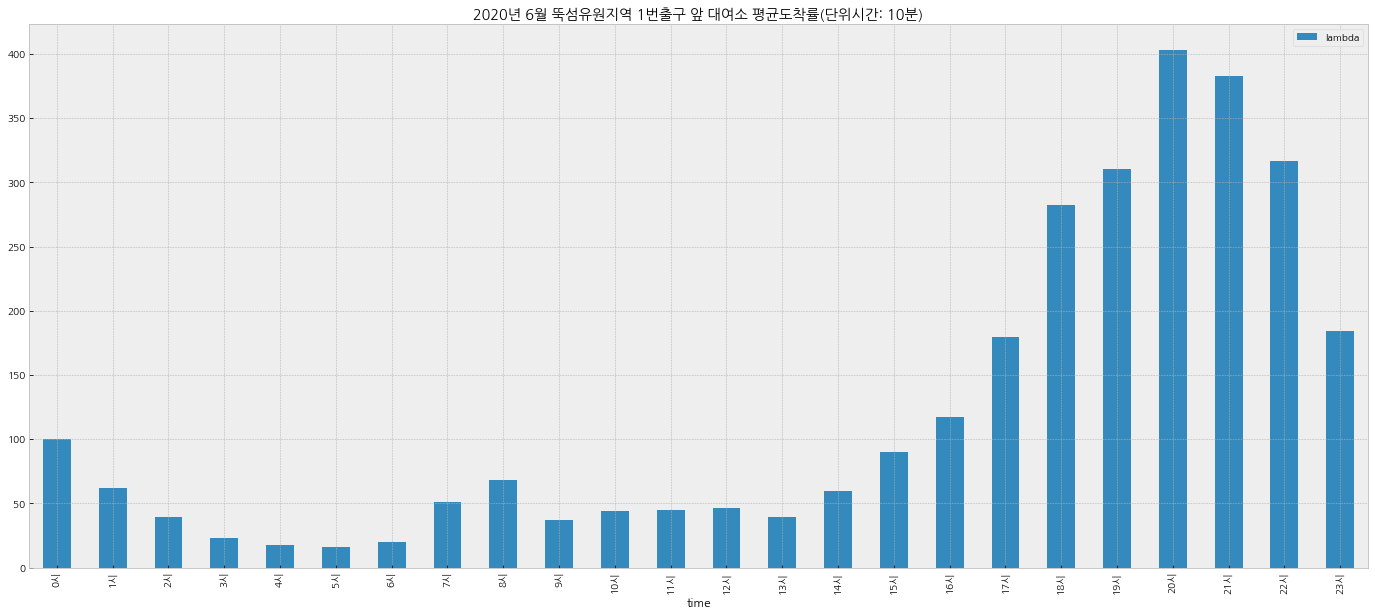

In [113]:
result.plot(kind = 'bar', x = 'time', y = 'lambda', figsize = (24, 10), 
            title = '2020년 6월 뚝섬유원지역 1번출구 앞 대여소 평균도착률(단위시간: 10분)')
plt.show()

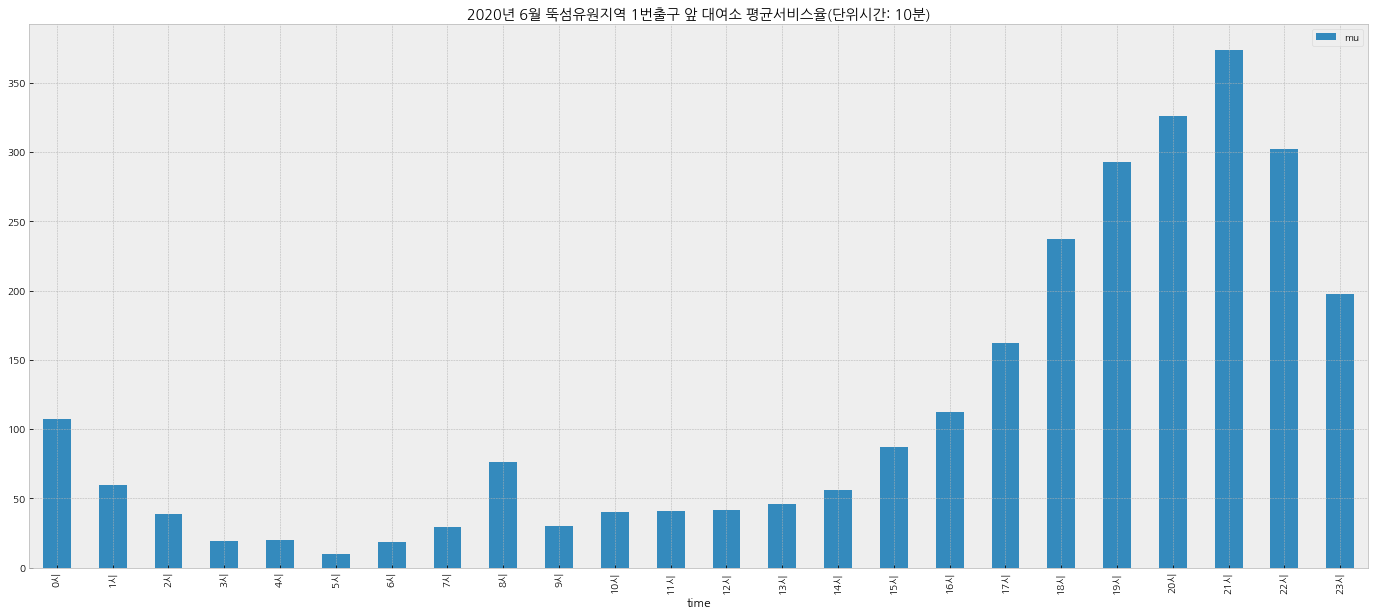

In [114]:
result.plot(kind = 'bar', x = 'time', y = 'mu', figsize = (24, 10), 
            title = '2020년 6월 뚝섬유원지역 1번출구 앞 대여소 평균서비스율(단위시간: 10분)')
plt.show()

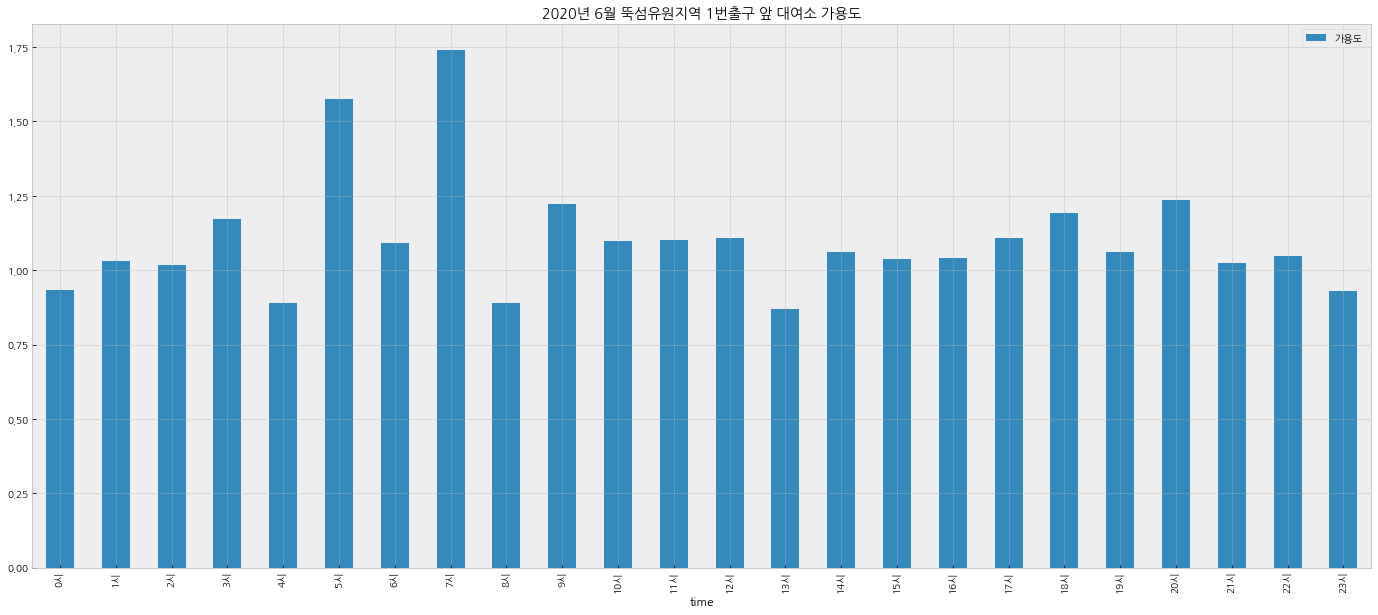

In [115]:
result.plot(kind = 'bar', x = 'time', y = '가용도', figsize = (24, 10), 
            title = '2020년 6월 뚝섬유원지역 1번출구 앞 대여소 가용도')
plt.show()

- 가용도가 1이하인 시간대는 반납보다 대여가 많아서 자전거 빌리기 어려움
- 0시, 4시, 8시, 13시, 23시에 가용도가 1이하
- 21년 6월 동일 대여소와 비교해 봤을 땐 비슷한 것 같음
- 21년 6월 동일 대여소와 마찬가지로 롯데월드타워 대영소보다 가용도가 일정한 편이고 대부분 1보다 큼